# Prepare the dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 775M/775M [00:30<00:00, 26.8MB/s] 

Extracting files...


Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1


In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

In [4]:
IMG_SIZE = 64
BATCH_SIZE = 32

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
train_data = datagen.flow_from_directory(
    path + "\\PetImages",
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    path + "\\PetImages",
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset='validation'
)

train_data.class_indices

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


{'Cat': 0, 'Dog': 1}

# Create model

In [20]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(train_data.num_classes, activation="softmax")
])

# Train

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    epochs=10,
    validation_data = val_data,
)

Epoch 1/10


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:1172: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 283ms/step - accuracy: 0.6237 - loss: 0.6868 - val_accuracy: 0.6861 - val_loss: 0.6131
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.6905 - loss: 0.6104 - val_accuracy: 0.6743 - val_loss: 0.6180
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.7010 - loss: 0.5996 - val_accuracy: 0.6929 - val_loss: 0.6040
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.7095 - loss: 0.5905 - val_accuracy: 0.7037 - val_loss: 0.5898
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7175 - loss: 0.5809 - val_accuracy: 0.7129 - val_loss: 0.5895
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 134ms/step - accuracy: 0.7219 - loss: 0.5763 - val_accuracy: 0.7331 - val_loss: 0.5733
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7290 - loss: 0.5704 - val_accuracy: 0.7243 - val_loss: 0.5729
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.7337 - loss: 0.5668 - val_accu

# Đánh giá

In [22]:
loss, accuracy = model.evaluate(val_data)
print(f"Accuracy: {accuracy:.4f}")
print(f"Loss: {loss:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.7353 - loss: 0.5680
Accuracy: 0.7353
Loss: 0.5680


# Prediction

In [29]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

In [34]:
img_path = 'C:\\Users\\Admin\\Downloads\\dog.jpg'
img = image.load_img(img_path, target_size = (IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = img_array/255.0
img_array = np.expand_dims(img_array, axis=0)

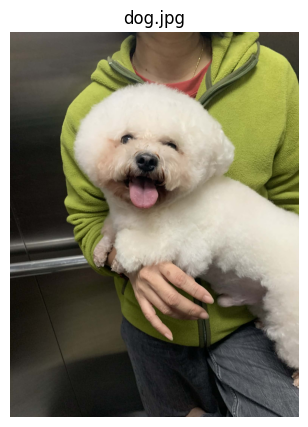

In [35]:
import cv2
img = cv2.imread(img_path)
plt.rcParams['figure.figsize'] = [5, 5]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(img_path.split("\\")[-1])
plt.axis('off')
plt.show()

In [36]:
class_name = list(train_data.class_indices.keys())
print(class_name)

['Cat', 'Dog']


In [37]:
prediction = model.predict(img_array)
predicted_idex = np.argmax(prediction)
predicted_label = class_name[predicted_idex]

print(prediction)
print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.28729805 0.7127019 ]]
Predicted label: Dog
